In [1]:
import re
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba


def readFile(filename):
    f = open(filename, 'r', encoding='UTF-8')
    content = f.readlines()
    f.close()
    return content


def addJiebaWordDic():
    word = ["或有負債","不動產廠房及設備","馬達","其他綜合損益","無形資產"]
    for w in word:
        jieba.add_word(w, freq=None, tag=None)


def tokenization(content):
    # strip and replace space
    for i in range(len(content)):
        content[i] = content[i].strip()
        content[i] = content[i].replace(" ", "")
    #remove empty item
    content = list(filter(None, content))
    #join all list to string
    content = ''.join(content)
    #remove \t\n\r\f\v
    content = re.sub('[\t\n\r\f\v]', '', content)
    #remove punctuation marks
    puncs = '，、：。～「」；？！「」『』—（）…－'
    content = re.sub('['+puncs+']', '', content)
    content = re.sub('['+string.punctuation+']','',content)
    #remove numbers
    content = re.sub('[0-9]','',content)
    #remove english
    content = re.sub('[a-zA-Z]','',content)

    token_list = jieba.cut(content, cut_all=False)
    token_list = list(token_list)

    return token_list

def removeStopWord(token_list):
    #Read Stop Word List
    stop_word_list = readFile('stop-word-list.txt')
    for i in range(len(stop_word_list)):
        stop_word_list[i] = stop_word_list[i].rstrip('\n')
    #remove stop word from token_list
    token_list = [token for token in token_list if token not in stop_word_list]
    return token_list


def wordDict(token_list):
    wordDict = {}
    for w in token_list:
        if w in wordDict:
            wordDict[w] = wordDict[w] + 1
        else:
            wordDict[w] = 1
    return wordDict


def writeFile(filename, token_list):
    f = open(filename, 'w', encoding='UTF-8')
    for token in token_list:
        f.write("%s\n" % token)
    f.close()

addJiebaWordDic()
content = readFile('附錄.txt')
token_list = tokenization(content)
token_list = removeStopWord(token_list)
word_Dict = wordDict(token_list)



Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/9l/y12qsfms1wg6wlz7_c_b3hf00000gn/T/jieba.cache
Loading model cost 1.019 seconds.
Prefix dict has been built succesfully.


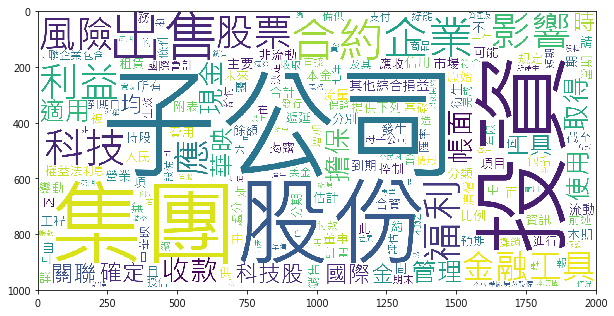

In [2]:
font = "msjh.ttf"
wordcloud = WordCloud(background_color="white",width=2000, height=1000, margin=2,font_path=font)
wordcloud.fit_words(word_Dict)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
wordcloud.to_file('wordDict.png')

In [3]:
words = sorted(word_Dict.items(), key=lambda x: x[1],reverse = True)
top_ten_word = words[:10]

In [4]:
top_ten_word

[('子公司', 452),
 ('投資', 315),
 ('股份', 283),
 ('集團', 268),
 ('出售', 228),
 ('合約', 158),
 ('企業', 146),
 ('福利', 122),
 ('科技', 120),
 ('影響', 116)]

In [5]:
label = []
data = []
for word in top_ten_word:
    label.append(word[0])
    data.append(word[1])

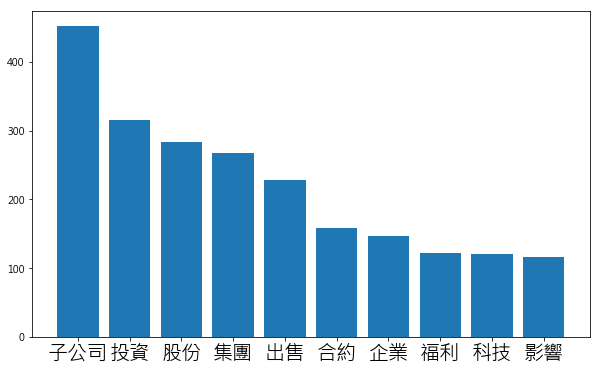

In [6]:
plt.figure(figsize=(10,6))
plt.bar(range(0,10),data)
plt.xticks(range(0,10),label,fontsize=20)
plt.show()